In [1]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# import result sets
df_nocuts = pd.read_csv("results_0.csv")
df_cuts = pd.read_csv("results_1.csv")

In [3]:
# keep instances that are solved for each of the five random seeds
max_repeat = 5
count_nocuts = df_nocuts['NAME'].value_counts()
count_cuts = df_cuts['NAME'].value_counts()
df_nocuts = df_nocuts[df_nocuts['NAME'].isin(count_nocuts[count_nocuts == max_repeat].index)]
df_cuts = df_cuts[df_cuts['NAME'].isin(count_cuts[count_cuts == max_repeat].index)]

# keep instances that are solved by both cut settings 
df_nocuts_new = df_nocuts.loc[df_nocuts.NAME.isin(df_cuts.NAME)]
df_cuts_new = df_cuts.loc[df_cuts.NAME.isin(df_nocuts.NAME)]

# 642 instances * 5 
print(df_cuts_new.shape)
print(df_nocuts_new.shape)

df_nocuts_new

(3210, 18)
(3210, 18)


,NAME,INITIAL LP,FIRST ROUND CUT,ROUND OF CUTS,OBJECTIVE VALUE ROOT NODE,BEST SOLUTION,SOLUTION TIME,PRESOLVING TIME,BEST PRIMAL BOUND,GAP,No. OF CUTS GENERATED,No. OF CUTS APPLIED,No. OF CUTS PRESENT IN LP AT THE END,No. OF NODES,RANDOM SEED,CUT SETTING,STATUS,END
0,10teams.mps.gz,20.0,0,0,917.0,924.0,12.212530,0.062201,9.240000e+02,0.000000e+00,210,0,0,276,2,0,optimal,DONE
1,10teams.mps.gz,20.0,0,0,917.0,924.0,12.444448,0.060087,9.240000e+02,0.000000e+00,210,0,0,276,4,0,optimal,DONE
2,10teams.mps.gz,20.0,0,0,917.0,924.0,12.331489,0.058780,9.240000e+02,0.000000e+00,210,0,0,276,8,0,optimal,DONE
3,10teams.mps.gz,20.0,0,0,917.0,924.0,12.467186,0.059116,9.240000e+02,0.000000e+00,210,0,0,276,16,0,optimal,DONE
4,10teams.mps.gz,20.0,0,0,917.0,924.0,12.477946,0.058801,9.240000e+02,0.000000e+00,210,0,0,276,32,0,optimal,DONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.085760,24.112732,1.000000e+20,1.000000e+20,15742,0,0,1,2,0,timelimit,DONE
3230,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.132740,36.634436,1.000000e+20,1.000000e+20,15742,0,0,1,4,0,timelimit,DONE
3231,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.088870,28.527020,1.000000e+20,1.000000e+20,15742,0,0,1,8,0,timelimit,DONE
3232,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.128380,28.580831,1.000000e+20,1.000000e+20,15742,0,0,1,16,0,timelimit,DONE


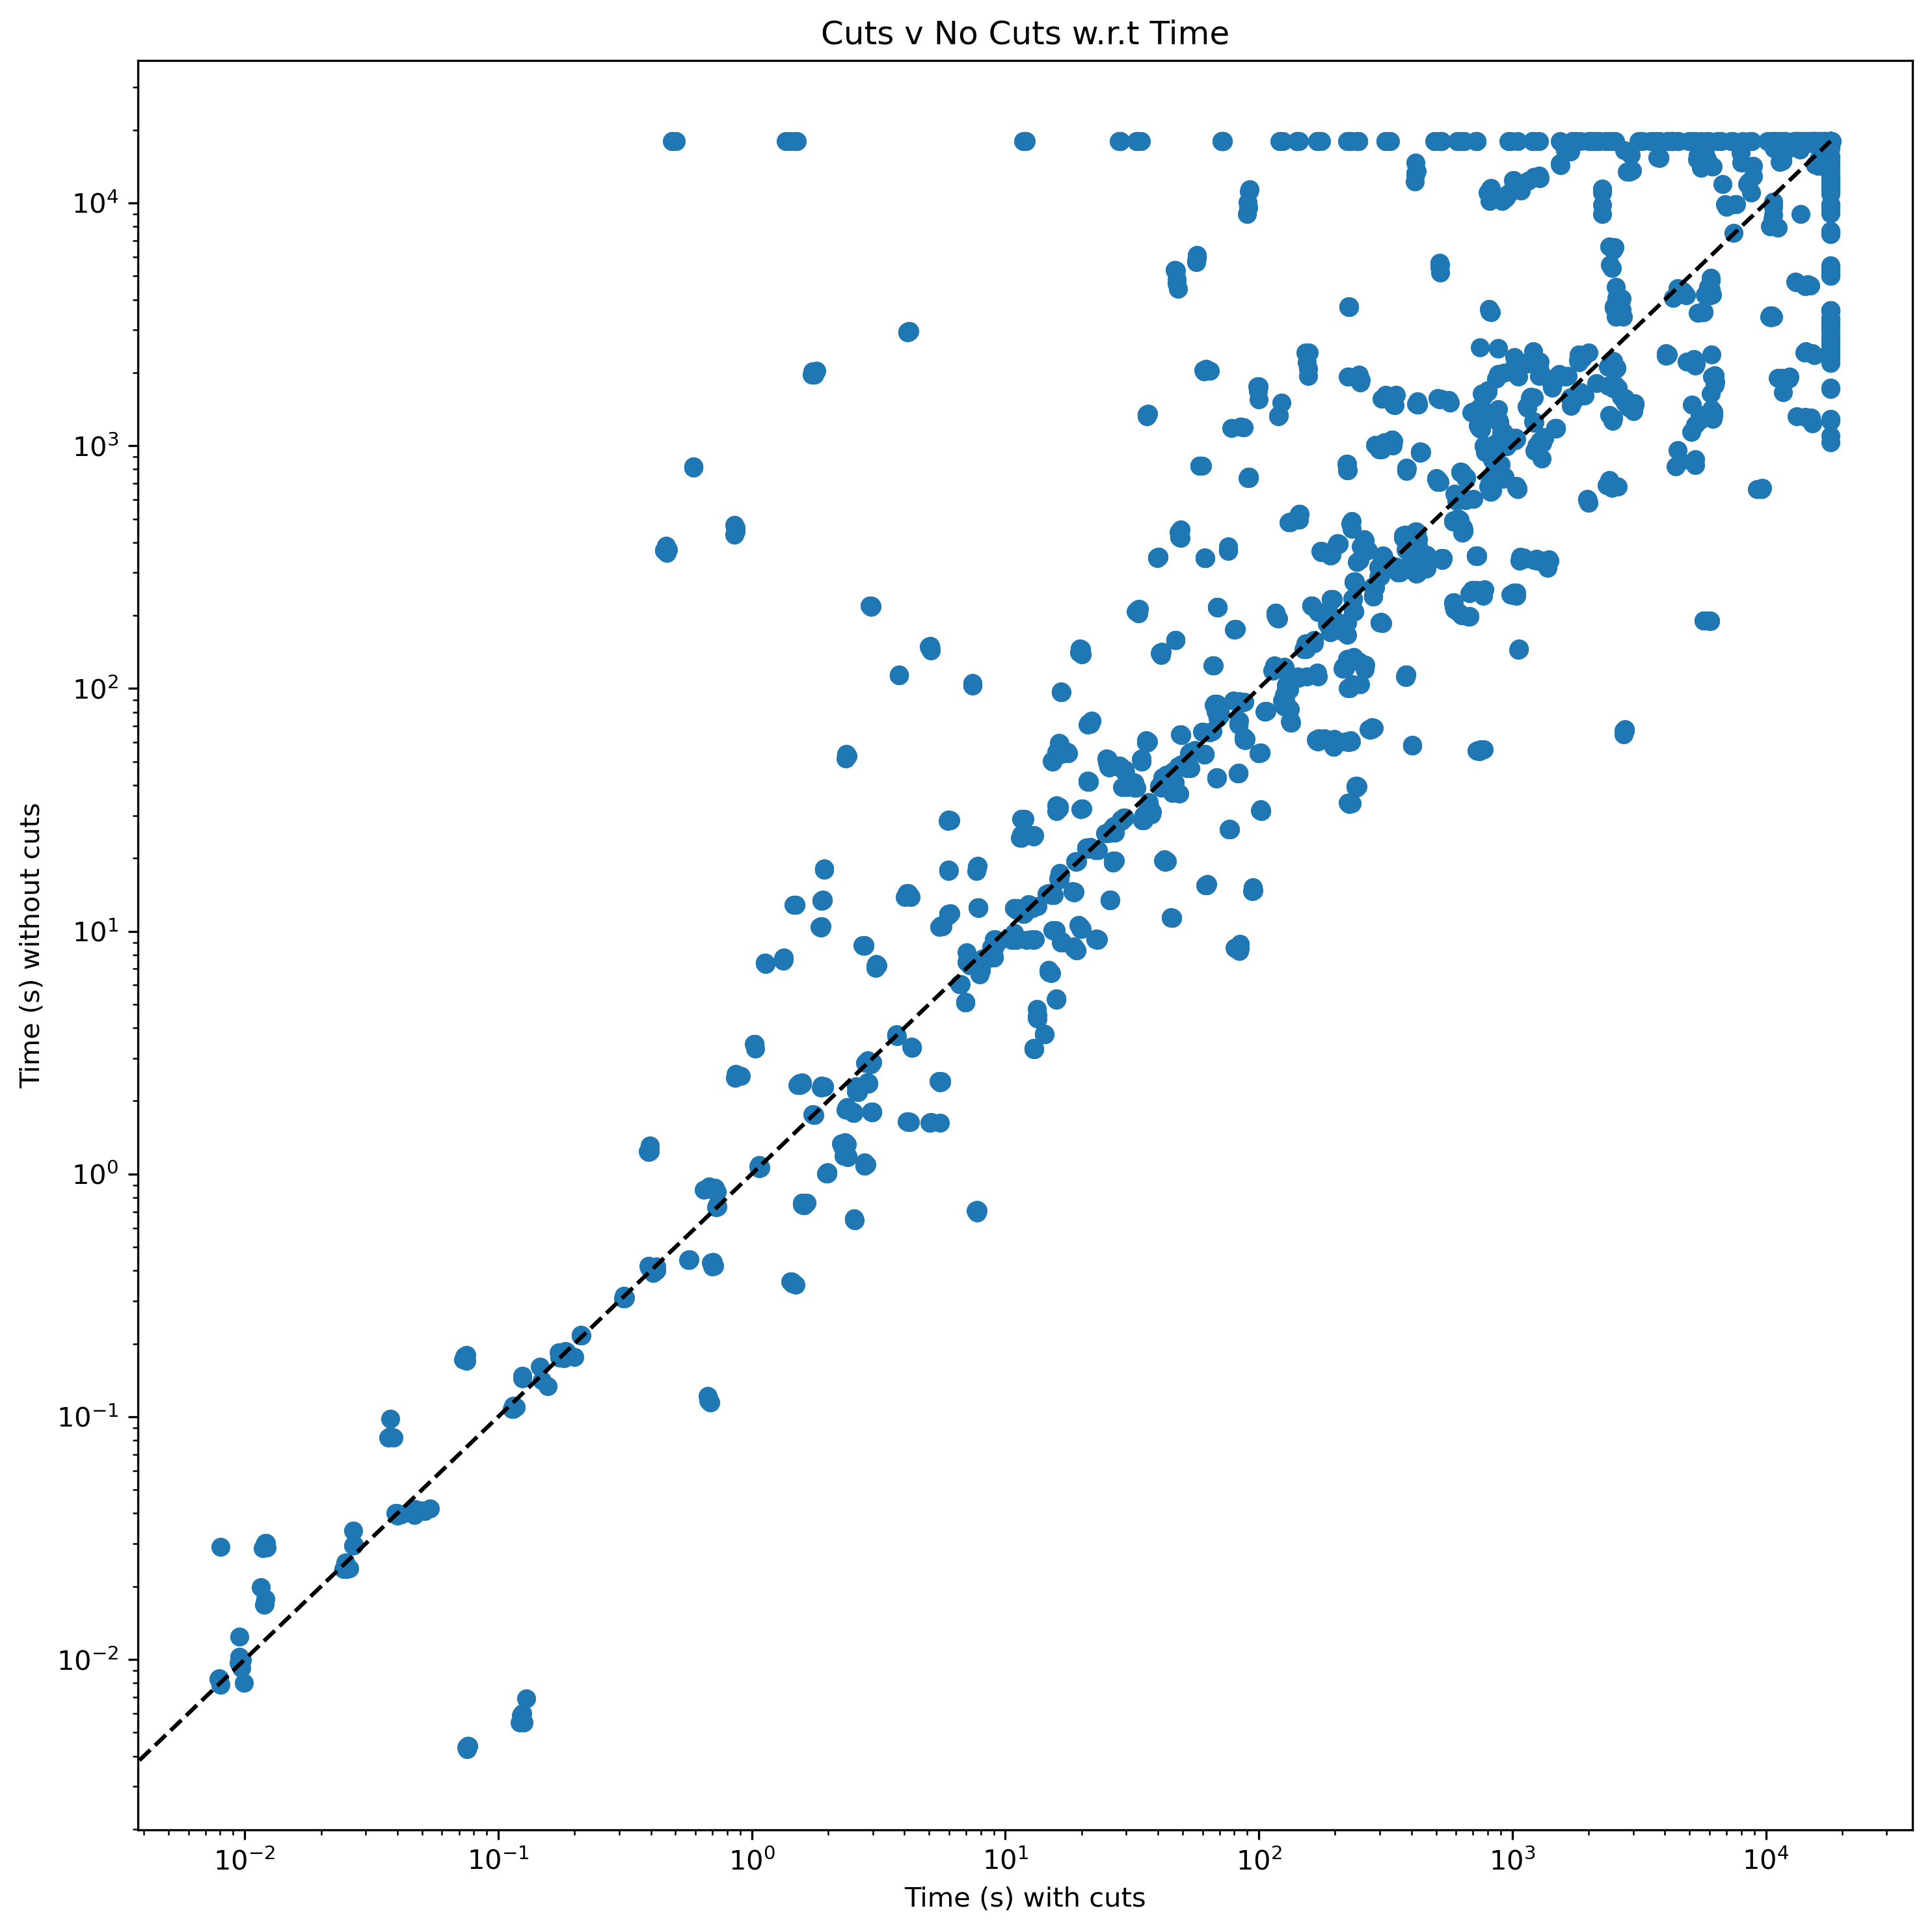

<Figure size 432x288 with 0 Axes>

In [4]:
# Scatter plot for distribution 
minx = 0
maxx = 18000

plt.figure(figsize=(10, 10), dpi=300)
plt.scatter(x=df_cuts_new['SOLUTION TIME'], y=df_nocuts_new['SOLUTION TIME'])

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
# fname = "originaldf"
# fig.savefig(fname, dpi=300)

In [5]:
# check if total instances in both settings are same
total_instances = 0
if len(df_cuts_new) == len(df_nocuts_new):
    total_instances += len(df_cuts_new)

print('Total instances:', total_instances)

# General Statistics
solved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] < 18000)]
solved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] < 18000)]

unsolved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] >= 18000)]
unsolved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] >= 18000)]


print('Instances Solved Using Cuts:', len(solved_cuts))
print('Instances Solved Using No Cuts:', len(solved_nocuts))

print('Instances Unsolved Using Cuts:', len(unsolved_cuts))
print('Instances Unsolved Using No Cuts:', len(unsolved_nocuts))

print('\n')

print('Percentage of Instances Solved Using Cuts:', (len(solved_cuts) / total_instances)*100)
print('Percentage of Instances Solved Using No Cuts:', (len(solved_nocuts) / total_instances)*100)

print('Percentage of Instances Unsolved Using Cuts:', (len(unsolved_cuts) / total_instances)*100)
print('Percentage of Instances Unsolved Using No Cuts:', (len(unsolved_nocuts) / total_instances)*100)

print('\n')

df_merged = df_cuts_new.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')

solved_both = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for both settings:', len(solved_both))

unsolved_both = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Unsolved for both settings:', len(unsolved_both))

solved_cuts = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Solved for Cuts but not for No Cuts:', len(solved_cuts))

solved_nocuts = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for No Cuts but not for Cuts:', len(solved_nocuts))

print('\n')

print('Percentage of Instances Solved or Unsolved for both settings:', ((len(solved_both)+len(unsolved_both)) / total_instances)*100)
print('Percentage of Instances Solved by Cuts out of remaining instances:', ((len(solved_cuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))
print('Percentage of Instances Solved by No Cuts out of remaining instances:', ((len(solved_nocuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))

print('\n')

# Excluding instances that solve within 10% of the time of either settings
cuts_win = df_merged[(df_merged['SOLUTION TIME_x'] < 0.9 * df_merged['SOLUTION TIME_y'])]
nocuts_win = df_merged[(df_merged['SOLUTION TIME_y'] < 0.9 * df_merged['SOLUTION TIME_x'])]

print('Cuts Outperform No Cuts:', len(cuts_win))
print('No Cuts Outperform Cuts:', len(nocuts_win))
print('Percentage Cuts Outperforms:', (len(cuts_win) / total_instances)*100)
print('Percentage No Cuts Outperforms:', (len(nocuts_win) / total_instances)*100)

Total instances: 3210
Instances Solved Using Cuts: 2041
Instances Solved Using No Cuts: 1855
Instances Unsolved Using Cuts: 1169
Instances Unsolved Using No Cuts: 1355


Percentage of Instances Solved Using Cuts: 63.58255451713396
Percentage of Instances Solved Using No Cuts: 57.78816199376947
Percentage of Instances Unsolved Using Cuts: 36.41744548286604
Percentage of Instances Unsolved Using No Cuts: 42.21183800623053


Instances Solved for both settings: 1778
Instances Unsolved for both settings: 1092
Instances Solved for Cuts but not for No Cuts: 263
Instances Solved for No Cuts but not for Cuts: 77


Percentage of Instances Solved or Unsolved for both settings: 89.40809968847351
Percentage of Instances Solved by Cuts out of remaining instances: 77.3529411764706
Percentage of Instances Solved by No Cuts out of remaining instances: 22.647058823529413


Cuts Outperform No Cuts: 992
No Cuts Outperform Cuts: 775
Percentage Cuts Outperforms: 30.903426791277262
Percentage No Cuts Outperf

In [6]:
# Geometric Shifted Mean for Time and Nodes
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_cuts_new, df_nocuts_new]

time = []
nodes = []
for data in df:
    time_ = data['SOLUTION TIME'].tolist()
    timeshift = [i + SHIFT_TIME for i in time_]
    time_geom = geometric_mean(timeshift) - SHIFT_TIME
    time.append(time_geom)
    
    nodes_ = data['No. OF NODES'].tolist()
    nodeshift = [i + SHIFT_NODES for i in nodes_]
    nodes_geom = geometric_mean(nodeshift) - SHIFT_NODES
    nodes.append(nodes_geom)
    
print(time)  
print(nodes)

print('Cuts is faster than No Cuts by (%):', 
      ((time[1] - time[0]) / time[1])*100)
print('Cuts explores fewer nodes than No Cuts by (%):', 
      ((nodes[1] - nodes[0]) / nodes[1])*100)
pd.set_option('display.max_columns', None)

[1389.583626428008, 1778.711039231674]
[7795.388344714367, 19812.47719075887]
Cuts is faster than No Cuts by (%): 21.876932465194127
Cuts explores fewer nodes than No Cuts by (%): 60.654146022939685


CREATING SETS:

SET 1: All runs of each instance solves before the timeout i.e. solve before 18000s

SET 2: At least one and at most 9 runs of each instance timeout

SET 3: Union of SETS 1 and 2

SET 4: All 10 runs timeout

SET 1

In [7]:
vc = solved_both['NAME'].value_counts()
analysis_set_1 = solved_both[solved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_1 = analysis_set_1[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y", 
                                 "GAP_x", "GAP_y"]]
analysis_set_1.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS', "GAP_x":"GAP W/ CUTS", 
                               "GAP_y":"GAP W/O CUTS"
                              }, inplace=True)
analysis_set_1['Minimum Time'] = analysis_set_1[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_1['Minimum Nodes'] = analysis_set_1[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis_set_1
#analysis_set_1.to_csv('analysis_set_1.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
0,10teams.mps.gz,2,11.088517,30,12.212530,276,0.0,0.0,11.088517,30
1,10teams.mps.gz,4,11.186637,30,12.444448,276,0.0,0.0,11.186637,30
2,10teams.mps.gz,8,11.044666,30,12.331489,276,0.0,0.0,11.044666,30
3,10teams.mps.gz,16,10.835616,30,12.467186,276,0.0,0.0,10.835616,30
4,10teams.mps.gz,32,10.833424,30,12.477946,276,0.0,0.0,10.833424,30
...,...,...,...,...,...,...,...,...,...,...
3195,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,0.0,0.0,1427.930347,67520
3196,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,0.0,0.0,1444.662760,67520
3197,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,0.0,0.0,1431.659624,67520
3198,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,0.0,0.0,1433.459125,67520


In [8]:
# Splitting the instances into buckets 
df_0 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 0)]
df_10 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 10)]
df_100 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 100)]
df_1000 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 1000)]
df_3600 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 3600)]

In [9]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [10]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [11]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                           Time                            \
Setting                              Cut       No Cut      Perfect   
Metric         Bucket                                                
Geometric Mean [0,18000)      196.627866   244.701124   152.423256   
               [10,18000)     368.163497   443.639538   273.618091   
               [100,18000)    920.036004  1047.461767   670.656853   
               [1000,18000)  3375.654161  3727.537136  2383.116172   
               [3600,18000)  7925.674500  9652.217131  6768.692186   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      3106.453952    7967.012311   2735.949945   
               [10,18000)     5605.053776   13840.151057   4807.364567   
               [100,18000)   10451.995680   21944.524800   8864.719143   
               [1000,18000)  47434.682145  100956.239613  37833.947697   
               [3600,18000)  92018.347853  192284.003111  73627.442382   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         1775  
               [10,18000)        1295  
               [100,18000)        790  
               [1000,18000)       277  
               [3600,18000)        70

SET 2

In [12]:
set_2 = pd.concat([df_cuts_new, df_nocuts_new])
set_2 = set_2.sort_values(by = ['NAME', 'CUT SETTING'], ascending = True)


counts = set_2['NAME'].value_counts()
res = set_2[~set_2['NAME'].isin(counts[counts < 10].index)]

dic = dict()
for index, row in res.iterrows():
    if row['SOLUTION TIME'] > 18000:
        if row['NAME'] in dic:
            dic[row['NAME']] += 1
        else:
            dic[row["NAME"]] = 1
        if dic[row['NAME']] == 10:
            del dic[row['NAME']]
# dic
set_2_nocuts = df_nocuts_new[df_nocuts_new['NAME'].isin(dic.keys())]
set_2_cuts = df_cuts_new[df_cuts_new['NAME'].isin(dic.keys())]

analysis_set_2 = set_2_cuts.merge(set_2_nocuts, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_set_2 = analysis_set_2[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y",
                                "GAP_x", "GAP_y"]]
analysis_set_2.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS',
                              "GAP_x":"GAP W/ CUTS", "GAP_y":"GAP W/O CUTS"}, inplace=True)
analysis_set_2['Minimum Time'] = analysis_set_2[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_2['Minimum Nodes'] = analysis_set_2[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

In [13]:
factor = 1
time_cuts = []
time_nocuts = []
for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] >= 18000:
        time_cuts.append(row['TIME W/ CUTS'] * factor)
    else:
        time_cuts.append(row['TIME W/ CUTS'])
        
    if row['TIME W/O CUTS'] >= 18000:
        time_nocuts.append(row['TIME W/O CUTS'] * factor)
    else:
        time_nocuts.append(row['TIME W/O CUTS'])

analysis_set_2['TIME W/ CUTS'] = time_cuts
analysis_set_2['TIME W/O CUTS'] = time_nocuts

analysis_set_2
# analysis_set_2.to_csv('analysis_set_2.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
0,arki001.mps.gz,2,18000.313650,2268704,3189.343775,1761208,0.00001,0.000000,3189.343775,1761208
1,arki001.mps.gz,4,18002.197530,2268815,3363.828610,1761208,0.00001,0.000000,3363.828610,1761208
2,arki001.mps.gz,8,18000.109870,2268854,3314.494150,1761208,0.00001,0.000000,3314.494150,1761208
3,arki001.mps.gz,16,18000.784610,2269143,3333.160491,1761208,0.00001,0.000000,3333.160491,1761208
4,arki001.mps.gz,32,18001.405890,2269104,2786.600859,1761208,0.00001,0.000000,2786.600859,1761208
...,...,...,...,...,...,...,...,...,...,...
350,uct-subprob.mps.gz,2,3242.629652,75300,18000.009930,2248602,0.00000,0.127013,3242.629652,75300
351,uct-subprob.mps.gz,4,3217.745203,75300,18000.010150,2200959,0.00000,0.127517,3217.745203,75300
352,uct-subprob.mps.gz,8,3207.929860,75300,18000.010290,2082822,0.00000,0.128313,3207.929860,75300
353,uct-subprob.mps.gz,16,3157.883368,75300,18000.009940,2152111,0.00000,0.127685,3157.883368,75300


In [14]:
df_0 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 0)]
df_10 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 10)]
df_100 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 100)]
df_1000 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 1000)]
df_3600 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 3600)]

In [15]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [16]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                              \
Setting                               Cut        No Cut       Perfect   
Metric         Bucket                                                   
Geometric Mean [0,18000)      3814.294037  14038.063619   2964.738109   
               [10,18000)     4309.741767  13937.219625   3327.153601   
               [100,18000)    5806.952557  13661.295880   4398.096230   
               [1000,18000)  10034.873789  12916.914762   7194.816671   
               [3600,18000)  12489.353812  15126.886672  10495.230209   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)     22928.795314  214074.340194  18889.238633   
               [10,18000)    25234.752577  196755.553386  20689.357271   
               [100,18000)   30757.894555  160387.223813  24868.182779   
               [1000,18000)  48953.772332  133288.876654  38029.898803   
               [3600,18000)  62313.569287  154724.891897  49959.203633   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          355  
               [10,18000)         345  
               [100,18000)        320  
               [1000,18000)       266  
               [3600,18000)       202

SET 3

In [17]:
analysis_set_3 = pd.concat([analysis_set_1, analysis_set_2])
analysis_set_3 = analysis_set_3.sort_values(by = ['NAME', 'RANDOM SEED'], ascending = True)

# analysis_set_3.to_csv('analysis_set_3.csv')

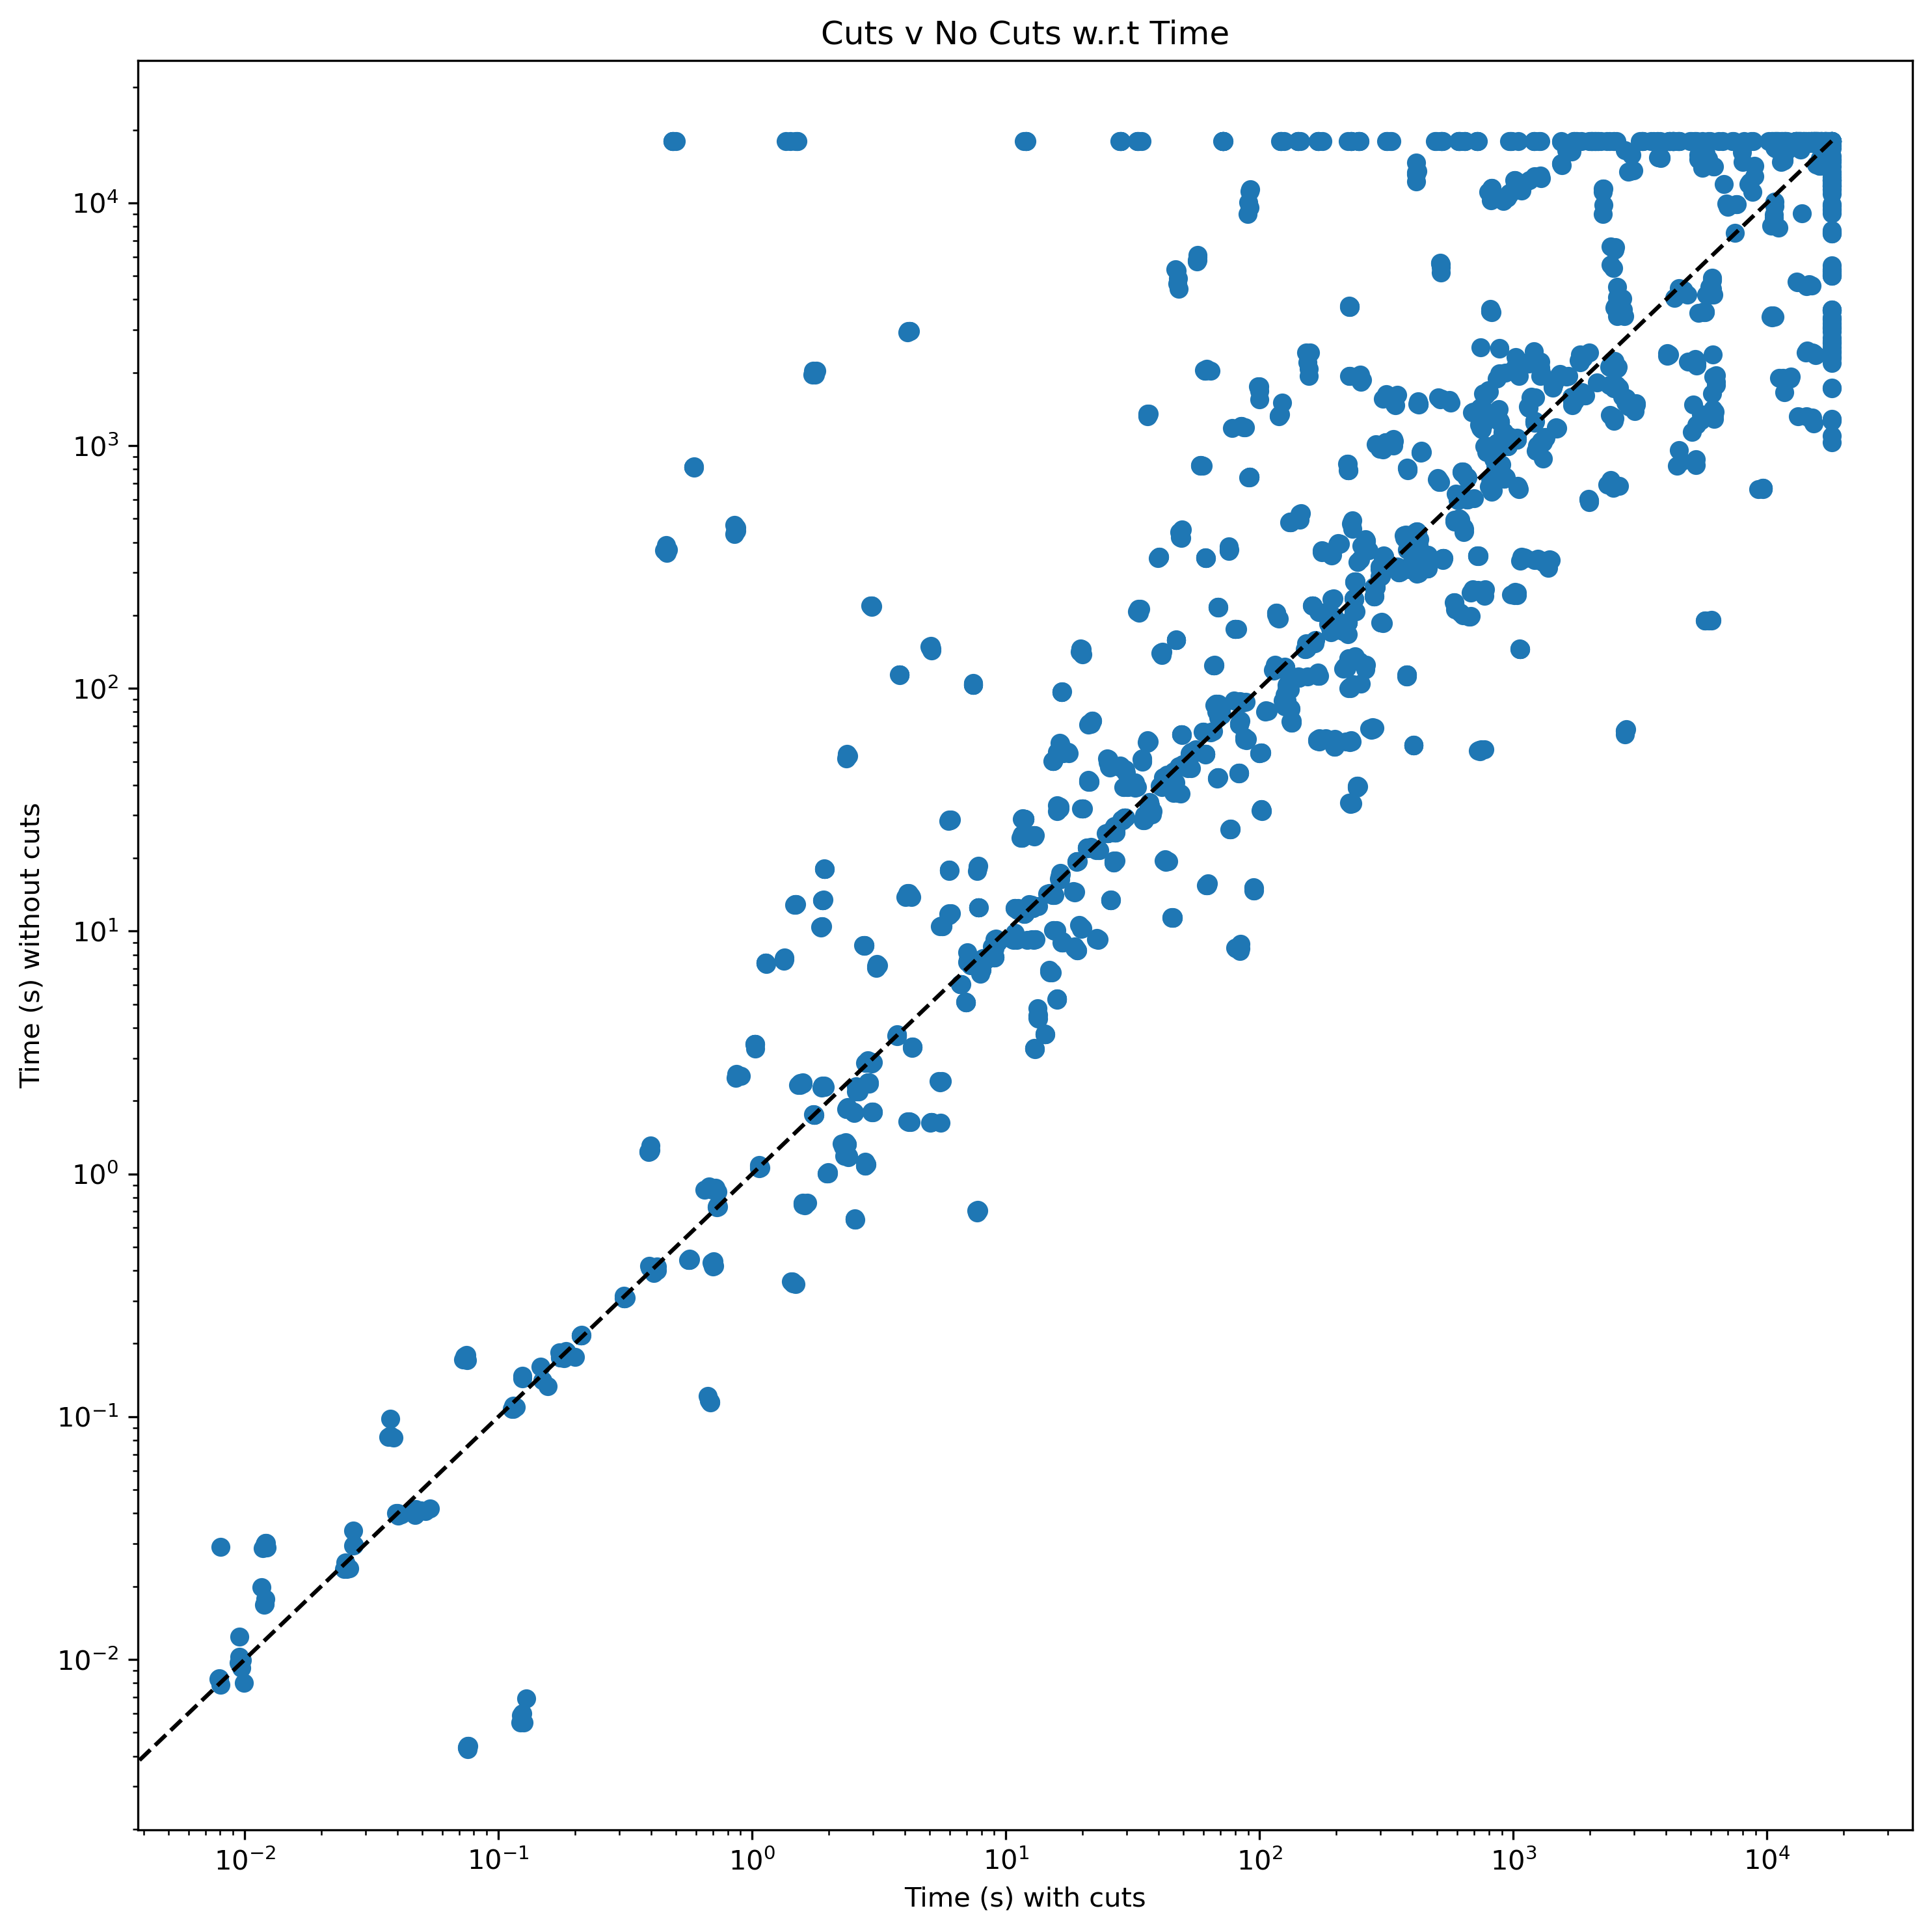

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot for set 3 i.e., set1,2 in the thesis
minx = 0
maxx = 18000

plt.figure(figsize=(10, 10), dpi=300)
plt.scatter(x=analysis_set_3['TIME W/ CUTS'], y=analysis_set_3['TIME W/O CUTS'])
# plt.scatter(x=hard['TIME W/ CUTS'], y=hard['TIME W/O CUTS'])
# plt.legend(["easy" , "hard"], bbox_to_anchor = (1 , 1))

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
# fname = "set1,2"
# fig.savefig(fname, dpi=300)

In [19]:
df_0 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 0)]
df_10 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 10)]
df_100 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 100)]
df_1000 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 1000)]
df_3600 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 3600)]

In [20]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [21]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         2130  
               [10,18000)        1640  
               [100,18000)       1110  
               [1000,18000)       543  
               [3600,18000)       272

CREATING DATA SET WITH ALL FEATURES FOR SET 3

In [22]:
analysis_ml = analysis_set_3 
analysis_ml = analysis_ml.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_ml = analysis_ml.drop(['Minimum Time', 'Minimum Nodes', 'FIRST ROUND CUT', 'ROUND OF CUTS', 
                                'OBJECTIVE VALUE ROOT NODE', 'BEST SOLUTION', 'SOLUTION TIME', 'BEST PRIMAL BOUND',
                                'GAP', 'No. OF CUTS GENERATED', 'No. OF CUTS APPLIED', 'No. OF CUTS PRESENT IN LP AT THE END',
                                'CUT SETTING', 'No. OF NODES', 'STATUS', 'END'], axis=1)
analysis_ml

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,INITIAL LP,PRESOLVING TIME
0,10teams.mps.gz,2,11.088517,30,12.212530,276,0.0,0.0,20.0,0.062201
1,10teams.mps.gz,4,11.186637,30,12.444448,276,0.0,0.0,20.0,0.060087
2,10teams.mps.gz,8,11.044666,30,12.331489,276,0.0,0.0,20.0,0.058780
3,10teams.mps.gz,16,10.835616,30,12.467186,276,0.0,0.0,20.0,0.059116
4,10teams.mps.gz,32,10.833424,30,12.477946,276,0.0,0.0,20.0,0.058801
...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,0.0,0.0,-24.0,1.552340
2126,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,0.0,0.0,-24.0,1.914422
2127,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,0.0,0.0,-24.0,1.507830
2128,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,0.0,0.0,-24.0,1.547767


In [23]:
static = pd.read_csv("features_original.csv")
static = static.filter(['instance_name', 'vars', 'bin_vars', 'int_vars', 'cont_vars', 
                       'constr', 'linsetpart_constr', 'linsetpack_constr', 'linsetcov_constr', 'lincard_constr',
                       'lineqknap_constr', 'linbinpack_constr', 'linknaps_constr', 'linintknap_constr',
                        'linmixbin_constr', 'nonzeroes', 'obj_dyn', 'dynamism_mean'], axis = 1)
static['instance_name'] = static.instance_name.str.split('/').str[-1]

static_new = static.loc[static.instance_name.isin(analysis_set_3.NAME)]

static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )

static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
static_new['int_vars'] = static_new['int_vars'] / static_new['vars']
static_new['cont_vars'] = static_new['cont_vars'] / static_new['vars']

static_new['linbinpack_constr'] = static_new['linbinpack_constr'] / static_new['constr']
static_new['lincard_constr'] = static_new['lincard_constr'] / static_new['constr']
static_new['lineqknap_constr'] = static_new['lineqknap_constr'] / static_new['constr']
static_new['linintknap_constr'] = static_new['linintknap_constr'] / static_new['constr']
static_new['linknaps_constr'] = static_new['linknaps_constr'] / static_new['constr']
static_new['linmixbin_constr'] = static_new['linmixbin_constr'] / static_new['constr']
static_new['linsetcov_constr'] = static_new['linsetcov_constr'] / static_new['constr']
static_new['linsetpack_constr'] = static_new['linsetpack_constr'] / static_new['constr']
static_new['linsetpart_constr'] = static_new['linsetpart_constr'] / static_new['constr']

static_new['vars'] = np.log(static_new['vars'])
static_new['constr'] = np.log(static_new['constr'])

static_new.rename(columns={'instance_name': 'NAME'}, inplace=True)

static_new

<ipython-input-23-edaf87848c2e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )
<ipython-input-23-edaf87848c2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
<ipython-input-23-edaf87848c2e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,NAME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean
27,drayage-25-27.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.946700,4.357370
36,drayage-25-32.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.965990,4.357370
66,drayage-100-12.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.920630,4.357390
67,drayage-25-23.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.884700,4.357380
159,drayage-100-23.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.884700,4.357380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,istanbul-no-cutoff.mps.gz,8.572060,0.005680,0.0,0.994320,9.920640,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000049,0.0,0.992628,0.000665,1.257010,0.255187
5619,30_70_45_095_100.mps.gz,9.303466,0.999909,0.0,0.000091,9.435562,0.000000,0.000000,0.001437,0.0,0.0,0.0,0.000000,0.0,0.164139,0.000339,3.789020,0.000000
5631,eil33-2.mps.gz,8.415382,1.000000,0.0,0.000000,3.465736,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.306155,0.778142,0.000000
5709,map10.mps.gz,12.010952,0.000887,0.0,0.999113,12.703260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000003,0.0,0.027666,0.000010,0.000000,0.000003


In [24]:
# Presolve Features

presol = pd.read_csv("features_after_trivial_presolving.csv")
presol = presol.filter(['instance_name', 'vars', 'int_vars', 'constr'], axis = 1)

presol['instance_name'] = presol.instance_name.str.split('/').str[-1]

presol_new = presol.loc[presol.instance_name.isin(analysis_set_3.NAME)]

presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']

presol_new['vars'] = np.log(presol_new['vars'])
presol_new['constr'] = np.log(presol_new['constr'])

presol_new.rename(columns={'instance_name': 'NAME', 'vars': 'presol_vars', 'int_vars': 'presol_int_vars', 
                            'constr': 'presol_constr'}, inplace=True)

<ipython-input-24-bd3daf2a7fae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']
<ipython-input-24-bd3daf2a7fae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['vars'] = np.log(presol_new['vars'])
<ipython-input-24-bd3daf2a7fae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [25]:
ml_1 = analysis_ml.merge(static_new, on = "NAME", how = "left")
ml_2 = ml_1.merge(presol_new, on = "NAME", how = "left")
ml_2.to_csv('ml.csv')
ml_2

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,INITIAL LP,PRESOLVING TIME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,2,11.088517,30,12.212530,276,0.0,0.0,20.0,0.062201,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
1,10teams.mps.gz,4,11.186637,30,12.444448,276,0.0,0.0,20.0,0.060087,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
2,10teams.mps.gz,8,11.044666,30,12.331489,276,0.0,0.0,20.0,0.058780,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
3,10teams.mps.gz,16,10.835616,30,12.467186,276,0.0,0.0,20.0,0.059116,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
4,10teams.mps.gz,32,10.833424,30,12.477946,276,0.0,0.0,20.0,0.058801,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,0.0,0.0,-24.0,1.552340,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2126,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,0.0,0.0,-24.0,1.914422,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2127,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,0.0,0.0,-24.0,1.507830,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2128,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,0.0,0.0,-24.0,1.547767,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025


SET 4

In [26]:
vc = unsolved_both['NAME'].value_counts()
analysis_set_4 = unsolved_both[unsolved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_4 = analysis_set_4[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y", 
                                 "GAP_x", "GAP_y"]]
analysis_set_4.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS', "GAP_x":"GAP W/ CUTS", 
                               "GAP_y":"GAP W/O CUTS"
                              }, inplace=True)
analysis_set_4['Minimum Time'] = analysis_set_4[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_4['Minimum Nodes'] = analysis_set_4[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis_set_4
# analysis_set_4.to_csv('analysis_set_4.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
15,2club200v15p5scn.mps.gz,2,18000.00059,290177,18000.00309,1275331,6.236559e-01,4.365672e-01,18000.00059,290177
16,2club200v15p5scn.mps.gz,4,18000.00046,309345,18000.00657,1469791,6.209677e-01,4.268657e-01,18000.00046,309345
17,2club200v15p5scn.mps.gz,8,18000.00121,307483,18000.00448,1470499,6.209677e-01,4.268657e-01,18000.00121,307483
18,2club200v15p5scn.mps.gz,16,18000.00076,308430,18000.00331,1487302,6.209677e-01,4.253731e-01,18000.00076,308430
19,2club200v15p5scn.mps.gz,32,18000.00104,299915,18000.00611,1540026,6.218166e-01,4.253731e-01,18000.00104,299915
...,...,...,...,...,...,...,...,...,...,...
3205,woodlands09.mps.gz,2,18000.10857,1,18000.08576,1,1.000000e+20,1.000000e+20,18000.08576,1
3206,woodlands09.mps.gz,4,18000.13846,1,18000.13274,1,1.000000e+20,1.000000e+20,18000.13274,1
3207,woodlands09.mps.gz,8,18000.12353,1,18000.08887,1,1.000000e+20,1.000000e+20,18000.08887,1
3208,woodlands09.mps.gz,16,18000.26565,1,18000.12838,1,1.000000e+20,1.000000e+20,18000.12838,1


STATISTICS FOR EVALUATION METRICS TABLE

SET 1

In [27]:
# Time and nodes
# new_1 =  analysis_set_1.groupby('NAME').mean()
# new_1.mean()

#gmean w/ cuts time
array = analysis_set_1['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

196.62786626179553

In [28]:
#gmean w/o cuts time
array = analysis_set_1['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

244.70112431344756

In [29]:
#gmean perfect time
array = analysis_set_1['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

152.42325601944725

In [30]:
#gmean w/ cuts nodes
array = analysis_set_1['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

3106.453951921957

In [31]:
#gmean w/o cuts nodes
array = analysis_set_1['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

7967.012311453249

In [32]:
#gmean perfect nodes
array = analysis_set_1['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

2735.9499447360545

In [33]:
#Variability
new_1 = analysis_set_1.groupby('NAME').std()
new_1.mean()

RANDOM SEED       12.198361
TIME W/ CUTS      38.323792
NODES W/ CUTS      0.000000
TIME W/O CUTS     63.942173
NODES W/O CUTS     0.000000
GAP W/ CUTS        0.000000
GAP W/O CUTS       0.000000
Minimum Time      21.951547
Minimum Nodes      0.000000
dtype: float64

In [34]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_1.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_1['RS solved w cuts'] = w_cut_list
analysis_set_1['RS solved w/o cuts'] = w_nocut_list

In [35]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_1.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_1['w cuts'] = wins_cut
analysis_set_1['w no cuts'] = wins_nocut

In [36]:
# rs solved values
new_1_1 = analysis_set_1.groupby('NAME').sum()
new_1_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          4.859385e+03
NODES W/ CUTS         6.831054e+05
TIME W/O CUTS         6.557203e+03
NODES W/O CUTS        2.150651e+06
GAP W/ CUTS           0.000000e+00
GAP W/O CUTS          0.000000e+00
Minimum Time          3.106709e+03
Minimum Nodes         5.458682e+05
RS solved w cuts      5.000000e+00
RS solved w/o cuts    5.000000e+00
w cuts                2.104225e+00
w no cuts             1.974648e+00
dtype: float64

In [37]:
# wins values
new_1_2 = new_1_1.sum()
new_1_2

RANDOM SEED           2.201000e+04
TIME W/ CUTS          1.725082e+06
NODES W/ CUTS         2.425024e+08
TIME W/O CUTS         2.327807e+06
NODES W/O CUTS        7.634812e+08
GAP W/ CUTS           0.000000e+00
GAP W/O CUTS          0.000000e+00
Minimum Time          1.102882e+06
Minimum Nodes         1.937832e+08
RS solved w cuts      1.775000e+03
RS solved w/o cuts    1.775000e+03
w cuts                7.470000e+02
w no cuts             7.010000e+02
dtype: float64

SET 2

In [38]:
# Time and nodes
new_2 =  analysis_set_2.groupby('NAME').mean()
new_2.mean()

#gmean w/ cuts time
array = analysis_set_2['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

3814.2940368328327

In [39]:
#gmean w/o cuts time
array = analysis_set_2['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

14038.06361932024

In [40]:
#gmean perfect time
array = analysis_set_2['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

2964.7381085945185

In [41]:
#gmean w/ cuts nodes
array = analysis_set_2['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

22928.795313897746

In [42]:
#gmean w/o cuts nodes
array = analysis_set_2['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

214074.3401938087

In [43]:
#gmean perfect nodes
array = analysis_set_2['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

18889.238633456156

In [44]:
#Variability
new_2 = analysis_set_2.groupby('NAME').std()
new_2.mean()

RANDOM SEED           12.198361
TIME W/ CUTS         201.814762
NODES W/ CUTS      10306.058118
TIME W/O CUTS        132.380248
NODES W/O CUTS    128994.146255
GAP W/ CUTS            0.005899
GAP W/O CUTS           3.610327
Minimum Time         326.216832
Minimum Nodes       7907.394375
dtype: float64

In [45]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_2['RS solved w cuts'] = w_cut_list
analysis_set_2['RS solved w/o cuts'] = w_nocut_list

In [46]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_2['w cuts'] = wins_cut
analysis_set_2['w no cuts'] = wins_nocut

In [47]:
# rs solved values
new_2_1 = analysis_set_2.groupby('NAME').sum()
new_2_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          4.704263e+04
NODES W/ CUTS         3.090445e+06
TIME W/O CUTS         7.849540e+04
NODES W/O CUTS        1.256243e+07
GAP W/ CUTS           2.816901e+19
GAP W/O CUTS          2.816901e+19
Minimum Time          3.554905e+04
Minimum Nodes         2.679905e+06
RS solved w cuts      3.746479e+00
RS solved w/o cuts    1.126761e+00
w cuts                3.450704e+00
w no cuts             1.042254e+00
dtype: float64

In [48]:
# wins values
new_2_2 = new_2_1.sum()
new_2_2

RANDOM SEED           4.402000e+03
TIME W/ CUTS          3.340027e+06
NODES W/ CUTS         2.194216e+08
TIME W/O CUTS         5.573173e+06
NODES W/O CUTS        8.919322e+08
GAP W/ CUTS           2.000000e+21
GAP W/O CUTS          2.000000e+21
Minimum Time          2.523983e+06
Minimum Nodes         1.902733e+08
RS solved w cuts      2.660000e+02
RS solved w/o cuts    8.000000e+01
w cuts                2.450000e+02
w no cuts             7.400000e+01
dtype: float64

In [49]:
# gap w/ cuts
# new_2_3 = analysis_set_2[analysis_set_2['GAP W/ CUTS'] < 1e+20]
# new_2_3.mean()

# new_2_3 = analysis_set_2.groupby('NAME').mean() 
# new_2_3 = new_2_3[new_2_3['GAP W/ CUTS'] < 1e+20]
# print(71 - len(new_2_3))
# new_2_3.mean()

In [50]:
# gap w/o cuts
# new_2_4 = analysis_set_2[analysis_set_2['GAP W/O CUTS'] < 1e+20]
# new_2_4.groupby('NAME').mean()
# new_2_4.mean()

# new_2_3 = analysis_set_2.groupby('NAME').mean() 
# new_2_3 = new_2_3[new_2_3['GAP W/O CUTS'] < 1e+20]
# print(71 - len(new_2_3))
# new_2_3.mean()

In [51]:
# Geom Mean for gap with cuts
new_2_4 = analysis_set_2[analysis_set_2['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_2)-len(new_2_4))
array = new_2_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


0.16512420930559557

In [52]:
# Geom Mean for gap with out cuts
new_2_4 = analysis_set_2[analysis_set_2['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_2)-len(new_2_4))
array = new_2_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


0.897709147514373

SET 3 

In [53]:
# Time and nodes
# new_3 =  analysis_set_3.groupby('NAME').mean()
# new_3.mean()

#gmean w/ cuts time
array = analysis_set_3['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

343.44586984282864

In [54]:
#gmean w/o cuts time
array = analysis_set_3['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

517.3266759183903

In [55]:
#gmean perfect time
array = analysis_set_3['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

270.7117922047034

In [56]:
#gmean w/ cuts nodes
array = analysis_set_3['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

4508.617322338619

In [57]:
#gmean w/o cuts nodes
array = analysis_set_3['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

14227.825971089806

In [58]:
#gmean perfect nodes
array = analysis_set_3['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

3936.705655410491

In [59]:
#Variability
new_3 = analysis_set_3.groupby('NAME').std()
new_3.mean()

RANDOM SEED          12.198361
TIME W/ CUTS         65.572287
NODES W/ CUTS      1717.676353
TIME W/O CUTS        75.348519
NODES W/O CUTS    21499.024376
GAP W/ CUTS           0.000983
GAP W/O CUTS          0.601721
Minimum Time         72.662428
Minimum Nodes      1317.899063
dtype: float64

In [60]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_3.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_3['RS solved w cuts'] = w_cut_list
analysis_set_3['RS solved w/o cuts'] = w_nocut_list

In [61]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_3.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_3['w cuts'] = wins_cut
analysis_set_3['w no cuts'] = wins_nocut

In [62]:
# rs solved values
new_3_1 = analysis_set_3.groupby('NAME').sum()
new_3_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          1.188993e+04
NODES W/ CUTS         1.084329e+06
TIME W/O CUTS         1.854690e+04
NODES W/O CUTS        3.885947e+06
GAP W/ CUTS           4.694836e+18
GAP W/O CUTS          4.694836e+18
Minimum Time          8.513766e+03
Minimum Nodes         9.015410e+05
RS solved w cuts      4.791080e+00
RS solved w/o cuts    4.354460e+00
w cuts                2.328638e+00
w no cuts             1.819249e+00
dtype: float64

In [63]:
# wins values
new_3_2 = new_3_1.sum()
new_3_2

RANDOM SEED           2.641200e+04
TIME W/ CUTS          5.065108e+06
NODES W/ CUTS         4.619240e+08
TIME W/O CUTS         7.900981e+06
NODES W/O CUTS        1.655413e+09
GAP W/ CUTS           2.000000e+21
GAP W/O CUTS          2.000000e+21
Minimum Time          3.626864e+06
Minimum Nodes         3.840565e+08
RS solved w cuts      2.041000e+03
RS solved w/o cuts    1.855000e+03
w cuts                9.920000e+02
w no cuts             7.750000e+02
dtype: float64

In [64]:
#gap w cuts
# new_3_3 = analysis_set_3.groupby('NAME').mean() 
# new_3_3 = new_3_3[new_3_3['GAP W/ CUTS'] < 1e+20]
# print(426 - len(new_3_3))
# new_3_3.mean()

# Geom Mean for gap with cuts
# new_3_3 = analysis_set_3[analysis_set_3['GAP W/ CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_3))
# stats.gmean(new_3_3.iloc[:,6])

In [65]:
# gap without cut
# new_3_3 = analysis_set_3.groupby('NAME').mean() 
# new_3_3 = new_3_3[new_3_3['GAP W/O CUTS'] < 1e+20]
# print(426 - len(new_3_3))
# new_3_3.mean()

# # Geom Mean for gap with cuts
# new_3_3 = analysis_set_3[analysis_set_3['GAP W/O CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_3))
# stats.gmean(new_3_3.iloc[:,7])

In [66]:
# Geom Mean for gap with cuts
new_3_4 = analysis_set_3[analysis_set_3['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_4))
array = new_3_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


0.026036143679439405

In [67]:
# Geom Mean for gap with out cuts
new_3_4 = analysis_set_3[analysis_set_3['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_4))
array = new_3_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


0.13742440193012762

SET 4

In [68]:
# Time and nodes
# new_4 =  analysis_set_4.groupby('NAME').mean()
# new_4.mean()

#gmean w/ cuts time
array = analysis_set_4['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

18000.50492491649

In [69]:
#gmean w/o cuts time
array = analysis_set_4['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

18000.19464898997

In [70]:
#gmean perfect time
array = analysis_set_4['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

18000.079052237008

In [71]:
#gmean w/ cuts nodes
array = analysis_set_4['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

21132.733916992605

In [72]:
#gmean w/ cuts nodes
array = analysis_set_4['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

37541.309192165565

In [73]:
#gmean w/ cuts nodes
array = analysis_set_4['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

18858.152696694273

In [74]:
#Variability
new_4 = analysis_set_4.groupby('NAME').std()
new_4.mean()

RANDOM SEED       1.219836e+01
TIME W/ CUTS      7.816592e-01
NODES W/ CUTS     8.700151e+04
TIME W/O CUTS     2.015082e-01
NODES W/O CUTS    1.527835e+05
GAP W/ CUTS       4.606186e+17
GAP W/O CUTS      2.070433e+17
Minimum Time      9.311078e-02
Minimum Nodes     8.305695e+04
dtype: float64

In [75]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_4.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_4['RS solved w cuts'] = w_cut_list
analysis_set_4['RS solved w/o cuts'] = w_nocut_list

In [76]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_4.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_4['w cuts'] = wins_cut
analysis_set_4['w no cuts'] = wins_nocut

In [77]:
# rs solved values
new_4_1 = analysis_set_4.groupby('NAME').sum()
new_4_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          9.000253e+04
NODES W/ CUTS         1.025354e+07
TIME W/O CUTS         9.000097e+04
NODES W/O CUTS        1.815761e+07
GAP W/ CUTS           1.337963e+20
GAP W/O CUTS          1.291667e+20
Minimum Time          9.000040e+04
Minimum Nodes         9.895308e+06
RS solved w cuts      0.000000e+00
RS solved w/o cuts    0.000000e+00
w cuts                0.000000e+00
w no cuts             0.000000e+00
dtype: float64

In [78]:
# wins values
new_4_2 = new_4_1.sum()
new_4_2

RANDOM SEED           1.339200e+04
TIME W/ CUTS          1.944055e+07
NODES W/ CUTS         2.214764e+09
TIME W/O CUTS         1.944021e+07
NODES W/O CUTS        3.922043e+09
GAP W/ CUTS           2.890000e+22
GAP W/O CUTS          2.790000e+22
Minimum Time          1.944009e+07
Minimum Nodes         2.137387e+09
RS solved w cuts      0.000000e+00
RS solved w/o cuts    0.000000e+00
w cuts                0.000000e+00
w no cuts             0.000000e+00
dtype: float64

In [79]:
# gap w/ cuts
# new_4_3 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
# print(len(analysis_set_4) - len(new_4_3))
# new_4_3.mean()

# new_4_4 = analysis_set_4.groupby('NAME').mean() 
# new_4_4 = new_4_4[new_4_4['GAP W/ CUTS'] < 1e+19]
# print(216 - len(new_4_4))
# new_4_4.mean()

In [80]:
# gap w/o cuts
# new_4_4 = analysis_set_4[analysis_set_4['GAP W/O CUTS'] < 1e+20]
# new_4_4.to_csv('aaa.csv')
# new_4_4.groupby('NAME').mean() 
# print(len(analysis_set_4) - len(new_4_4))
# new_4_4.mean()

# new_4_4 = analysis_set_4.groupby('NAME').mean() 
# new_4_4 = new_4_4[new_4_4['GAP W/O CUTS'] < 1e+19]
# print(216 - len(new_4_4))
# new_4_4.mean()

In [81]:
# Geom Mean for gap with cuts
# new_4_4 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
# stats.gmean(new_4_4.iloc[:,6])

new_4_4 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
array = new_4_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 289


3.5550929678703316

In [82]:
# Geom Mean for gap with out cuts
new_4_4 = analysis_set_4[analysis_set_4['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
array = new_4_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 279


3.881477766365885